# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


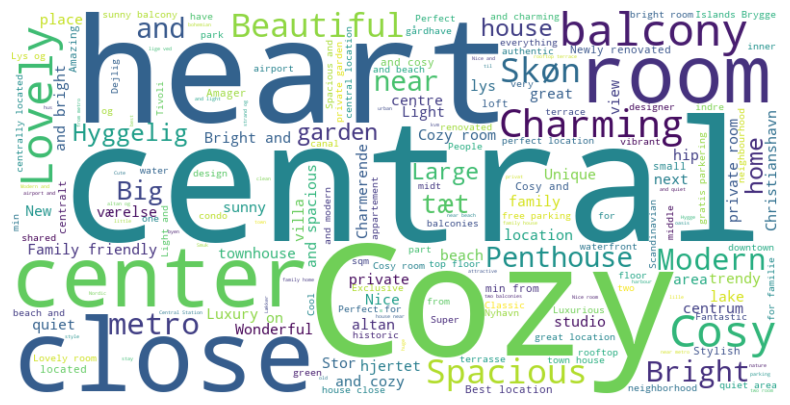

In [25]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

Anne         159
Mette        151
Christian    134
Maria        134
Julie        128
Anna         121
Rasmus       110
Morten       108
Mads         108
Thomas       107
Name: count, dtype: int64

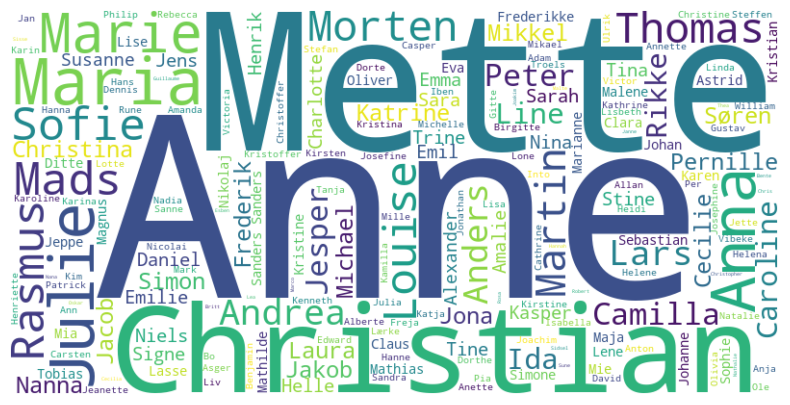

In [23]:
names = data_filtered["host_name"]

#Before we can plot the first names, we need to clean the data.

# These are the strings we want to split the names by
and_strings = [" & ", " and ", " og "]

# Create a list of first names
first_names = []


# Split the names by the and_strings, else split by space to only get the first name from a full name
#e.g. "John & Jane" -> ["John", "Jane"] AND "John Doe" -> "John
#Which means we also assume that the presence of an and_string means that neither will have their full name
for name in names:
    if any(and_string in name for and_string in and_strings):
        for and_string in and_strings:
            if and_string in name:
                first_names.append(name.split(and_string)[0])
                first_names.append(name.split(and_string)[1])
    else:
        first_names.append(name.split(" ")[0])

# Looking at the most frequent names, we noticed names such as: "ApartmentinCopenhagen". Which we will remove from the list of first names
filtered_names = ['ApartmentinCopenhagen']

# Removing all filtered names from the list of first names
first_names = [name for name in first_names if name not in filtered_names]

# Create and generate a word cloud image
text = ' '.join(first_names)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)



# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [24]:
#The top 10 most frequent host_names found were: 
display(pd.Series(first_names).value_counts().head(10))

Anne         159
Mette        151
Christian    134
Maria        134
Julie        128
Anna         121
Rasmus       110
Morten       108
Mads         108
Thomas       107
Name: count, dtype: int64

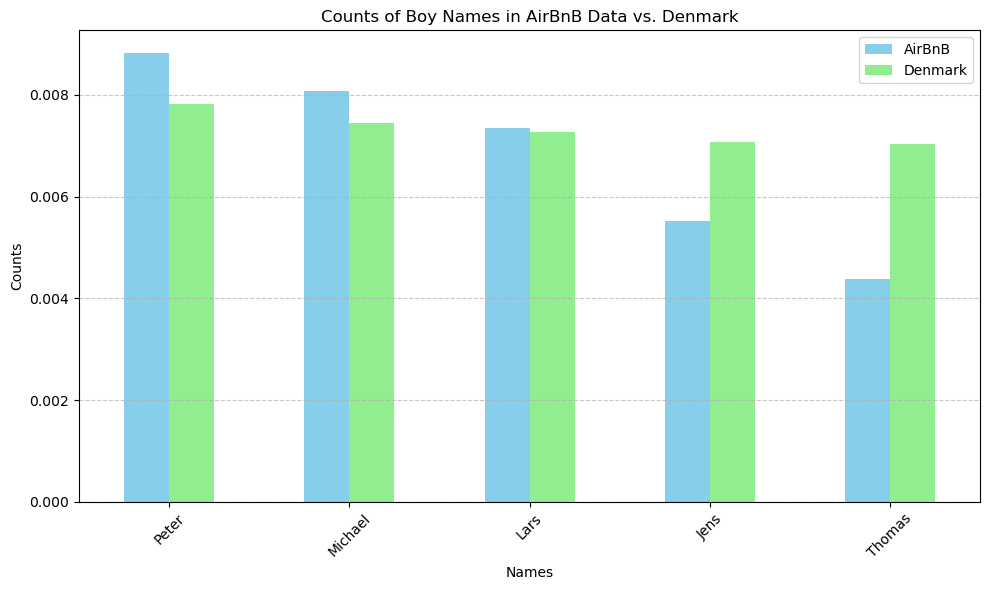

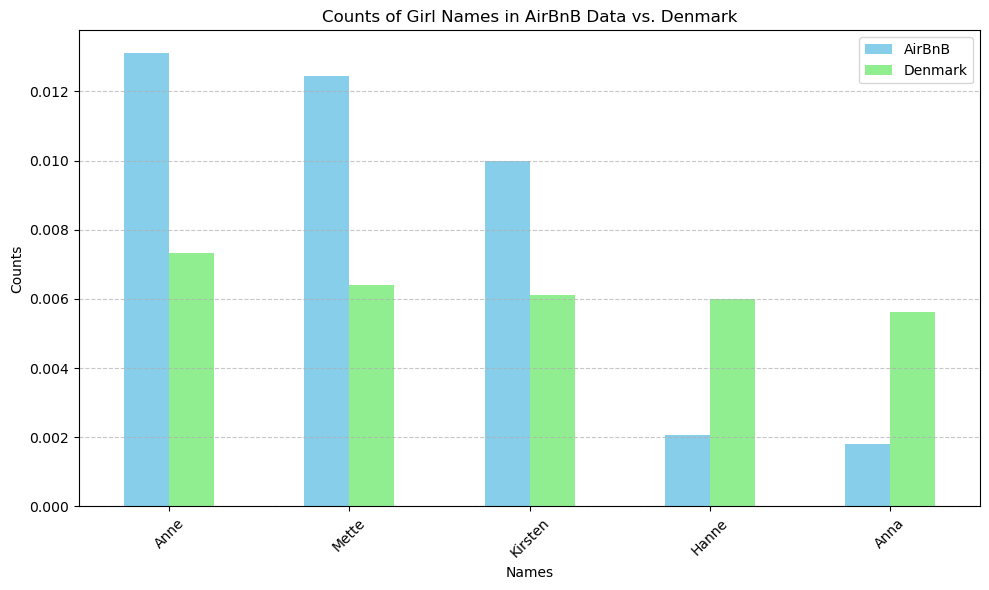

In [40]:
#With data collected from Danmarks Statistik, we can compare the distribution of the top 10 most frequent host names with 
#the distribution of the most frequent first names in Denmark.

#This is however going to be seperated into two different plots, 5 most frequent boy names, and 5 most frequent girl names

#These are the most frequent first names in Denmark, and the amount of people having the name. 
most_popular_boy_names = ["Peter", "Michael", "Lars", "Jens", "Thomas"]
most_popular_boy_names_amount = [46552, 44338, 43290, 42123, 41914]

most_popular_girl_names = ["Anne","Mette","Kirsten","Hanne","Anna"]
most_popular_girl_names_amount = [43741, 38133, 36401, 35725, 33537]

#To compare the distribution, i will get a frequency from diving the amount, with the amount of people in Denmark.

amount_of_people_in_denmark = 5961249

most_popular_boy_names_amount = [amount/amount_of_people_in_denmark for amount in most_popular_boy_names_amount]
most_popular_girl_names_amount = [amount/amount_of_people_in_denmark for amount in most_popular_girl_names_amount]


# Convert the list to a pandas Series
first_names_series = pd.Series(first_names)

# Get the occurences of the most popular names from Danmarks Statistik
popular_boy_name_occurences = first_names_series[first_names_series.isin(most_popular_boy_names)].value_counts().tolist()
popular_girl_name_ocurrences = first_names_series[first_names_series.isin(most_popular_girl_names)].value_counts().tolist()

rows_of_data_from_airbnb = len(data_filtered)

# Normalize the occurences by dividing by the amount of rows in the data
popular_boy_name_occurences = [occurence/rows_of_data_from_airbnb for occurence in popular_boy_name_occurences]
popular_girl_name_occurences = [occurence/rows_of_data_from_airbnb for occurence in popular_girl_name_ocurrences]


# Creating barchart for boys names: 
boy_data = {
    'Names': most_popular_boy_names,
    'AirBnB': popular_boy_name_occurences,
    'Denmark': most_popular_boy_names_amount
}


df = pd.DataFrame(boy_data)

df.set_index('Names', inplace=True)

# Plot the data using pandas plot() method
ax = df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Add labels and title
ax.set_xlabel('Names')
ax.set_ylabel('Counts')
ax.set_title('Counts of Boy Names in AirBnB Data vs. Denmark')
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Creating barchart for girls names: 
girl_data = {
    'Names': most_popular_girl_names,
    'AirBnB': popular_girl_name_occurences,
    'Denmark': most_popular_girl_names_amount
}

df = pd.DataFrame(girl_data)

df.set_index('Names', inplace=True)

ax = df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

ax.set_xlabel('Names')
ax.set_ylabel('Counts')
ax.set_title('Counts of Girl Names in AirBnB Data vs. Denmark')
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




# What does this tell me?
Looking at these bar charts, we can see the differences in boy and girl name occurences found in our AirBnB dataset, and the distribution of names in the entire population of Denmark.

Most notably we see almost double the amount of girls names in the AirBnB frequencies than in the entire population of Denmark. This could be due to the fact that the AirBnB dataset is nearly large enough to be representative of the entire population of Denmark. 

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [16]:
# State your solution here. Add more cells if needed.

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [17]:
# State your solution here. Add more cells if needed.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [18]:
# State your solution here. Add more cells if needed.

### 5. Based on self-chosen features, develop a logistic regression model and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

#### The Goal
The goal of this task is to categorize the rental properties as either 0 or 1, where 0 is affordable and 1 is expensive. 

#### The approach
We know that we will have to use Logistic Regression, and also K-Nearest Neighbors. 

We will be using the Training-Validation-Test approach to train and validate our models. Based off of different features. 

To start off with, we have chosen the following features to be used in our models:
(Also, assuming we cannot use the price as a feature, as that would be cheating)

##### Neighbourhood
We saw in task 3 that the difference in prices differs alot between the different neightbourhoods.

##### Room Type
We assume that the room type will also have a significant impact on the price of the rental property.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = data_filtered[[
    'neighbourhood_cleansed',
    'room_type',
    'price_category',
]]

data = pd.get_dummies(data, columns=['neighbourhood_cleansed', 'room_type'], drop_first=True)

# Prepare the data
X = data.copy().drop('price_category', axis=1)
y = data['price_category']

# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 


# Train the logistic regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate the model
accuracy_train = log_reg_model.score(X_train, y_train)
accuracy_val = log_reg_model.score(X_val, y_val)
print("Validation Accuracy training:", accuracy_train)
print("Validation Accuracy validation:", accuracy_val)




Validation Accuracy training: 0.6472938144329897
Validation Accuracy validation: 0.6505154639175258


# Next steps: 

1. Vis at vi prøver at se hvilke features der er mest relevante for modellen. 
2. Gerne i flere bloks. 

3. Prøv at brug Knearest neighbours, og se om det giver et bedre resultat.



In [ ]:
# For AFTER the optimal model has been found

# Test the model
X_test = test_data[['neighbourhood_cleansed', 'room_type']]  # Features
y_test = test_data['price_category']  # Target variable

test_predictions = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", accuracy)